In [39]:
import os
import datetime as date
import IPython
import IPython.display
import tensorflow as tf
from tensorflow import keras
import numpy as np 
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn
import datetime
import pickle


from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [40]:
URL = "/Users/haris/Desktop/Capstone2(eCommerce)/dataset/ecommerceDataset.csv"
column_name = ["category","description"]
df = pd.read_csv(URL, names=column_name)            

In [41]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50425 entries, 0 to 50424
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category     50425 non-null  object
 1   description  50424 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB


In [42]:
print("Shape: \n", df.shape)
print("NA values: \n", df.isna().sum())
print("Duplicated: \n",df.duplicated())
print("Categories:",df['category'].value_counts())

Shape: 
 (50425, 2)
NA values: 
 category       0
description    1
dtype: int64
Duplicated: 
 0        False
1        False
2        False
3        False
4        False
         ...  
50420     True
50421     True
50422     True
50423     True
50424     True
Length: 50425, dtype: bool
Categories: category
Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: count, dtype: int64


In [43]:
df.isna().sum()

category       0
description    1
dtype: int64

In [44]:
df[df["description"].isna() == True]

,category,description
39330,Clothing & Accessories,NaN


In [45]:
df.dropna(inplace= True)
df.isnull().sum()

category       0
description    0
dtype: int64

In [46]:
#Convert to integer using labelencoder
# Separate feature and label
feature = df['description'].values
label = df['category'].values

#(B) Perform label encoding to the category column
label_encoder = sklearn.preprocessing.LabelEncoder()
label_encoded = label_encoder.fit_transform(label)
label_encoded[:5]

array([3, 3, 3, 3, 3])

In [47]:
# Perform train-val-test split
import sklearn.model_selection
seed= 42

x_train,x_split,y_train,y_split = sklearn.model_selection.train_test_split(feature,label_encoded,train_size=0.7,random_state=seed)
x_val,x_test,y_val,y_test = sklearn.model_selection.train_test_split(x_split,y_split,train_size = 0.5, random_state=seed)

In [48]:
print(x_train.shape)
print(x_train.dtype)


(35296,)
object


In [49]:
print(x_val.shape)
print(x_val.dtype)

(7564,)
object


In [50]:
# 6. NLP 
# Tokenization layer

tokenizer = keras.layers.TextVectorization(max_tokens=5000, output_sequence_length=200) #train layer
tokenizer.adapt(x_train)

In [51]:
# [FYI] Test how the tokenizer works
sample_tokens = tokenizer(x_train[:2])
print(x_train[:2])
print(sample_tokens)

["Acer 18.5 inch (46.99 cm) LED Monitor - EB192Q (Black) Specifications LED 18.5 '' ACER EB192Qb (B). Brand ACER Model EB192Qb Response Time 5 ms Max. Resolution 1366x768 @ 60Hz Contrast Ratio 100 million: 1 (ACM). Brightness 200 nits (cd / m2). Display 18.5 inch Color System 16.7 m POWER Supply (100V-240V): Internal Power Consumption (Off): 0.45W Power Consumption (Sleep): 14W Power Consumption (on): 18W. VGA Port 1 Port."
 'SOUMIK ELECTRICALS 5-inch Subwoofer with Maximum 4 ohm(100 W) Thisb product is from the brand SOUMIK ELECTRICALS it presents a 5 Inch subwoofer with maximum 4 ohm and comes with 100W. Use in your home theatre.']
tf.Tensor(
[[3365 4947  173    1  147  152  622    1   55  595  152 4947 3365    1
  1613  151 3365  535    1 1478   61  105 1551  739  649    1    1 1619
  1972  115 1539   36    1 1495 1270    1 1373 3153  259 4947  173   65
   146    1  805   59  781    1 1290   59 1111  253    1   59 1111  943
     1   59 1111   15    1 1210  377   36  377    0    0   

In [52]:
# (B) Embedding 
embedding = keras.layers.Embedding(5000, 64)

In [53]:
# 7. Model Development

model = keras.Sequential()
# (A) NLP Layers
model.add(tokenizer)
model.add(embedding)
# (B) RNN 
model.add(keras.layers.Bidirectional(keras.layers.LSTM(32,return_sequences=False)))
model.add(keras.layers.Dense(5, activation='softmax'))

In [54]:
#8. Model Compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [55]:
# 9. Model Training
logpath = "tensorboard/Ecom/" + datetime.datetime.now().strftime("%Y-%m-%d_%H%M%S")
tb = keras.callbacks.TensorBoard(logpath)
es= keras.callbacks.EarlyStopping(patience=2,verbose=3)

# Training
history = model.fit(x_train,y_train,validation_data=(x_val,y_val), epochs=10,batch_size=32, callbacks=[tb,es])

Epoch 1/10
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 124s 108ms/step - accuracy: 0.8025 - loss: 0.5617 - val_accuracy: 0.9625 - val_loss: 0.1431
Epoch 2/10
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 123s 111ms/step - accuracy: 0.9741 - loss: 0.0983 - val_accuracy: 0.9614 - val_loss: 0.1378
Epoch 3/10
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 118s 107ms/step - accuracy: 0.9823 - loss: 0.0654 - val_accuracy: 0.9685 - val_loss: 0.1184
Epoch 4/10
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 117s 106ms/step - accuracy: 0.9873 - loss: 0.0482 - val_accuracy: 0.9619 - val_loss: 0.1430
Epoch 5/10
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 133s 121ms/step - accuracy: 0.9907 - loss: 0.0342 - val_accuracy: 0.9733 - val_loss: 0.1163
Epoch 6/10
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 123s 112ms/step - accuracy: 0.9931 - loss: 0.0271 - val_accuracy: 0.9705 - val_loss: 0.1375
Epoch 7/10
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 119s 108ms/step - accuracy: 0.9941 - loss: 0.0195 - val_accuracy: 0.9710 - val_loss: 0.1516
Epoch 7: early stopping


In [ ]:
# Further evaluate the performance with test data

evaluation = model.evaluate(x_test,y_test)
print(evaluation)

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9740 - loss: 0.1299
[0.15864120423793793, 0.9703860282897949]


In [57]:
prediction = model.predict(x_test)
prediction_index = np.argmax(prediction,axis=1)

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step


In [58]:
model_report = classification_report(y_test, prediction_index)
print(model_report)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1756
           1       0.96      0.98      0.97      1312
           2       0.96      0.96      0.96      1560
           3       0.98      0.97      0.97      2936

    accuracy                           0.97      7564
   macro avg       0.97      0.97      0.97      7564
weighted avg       0.97      0.97      0.97      7564



In [59]:
# Save Model
#(A) Tokenizer
with open('tokenizer.json', 'wb') as f:
    pickle.dump(tokenizer,f)

In [60]:
#(B) Label Encoder
with open("label_encoder.json","wb") as f:
    pickle.dump(label_encoder,f)

In [61]:
#(C) Model in .h5
keras.models.save_model(model, "saved_models/Classification.h5")

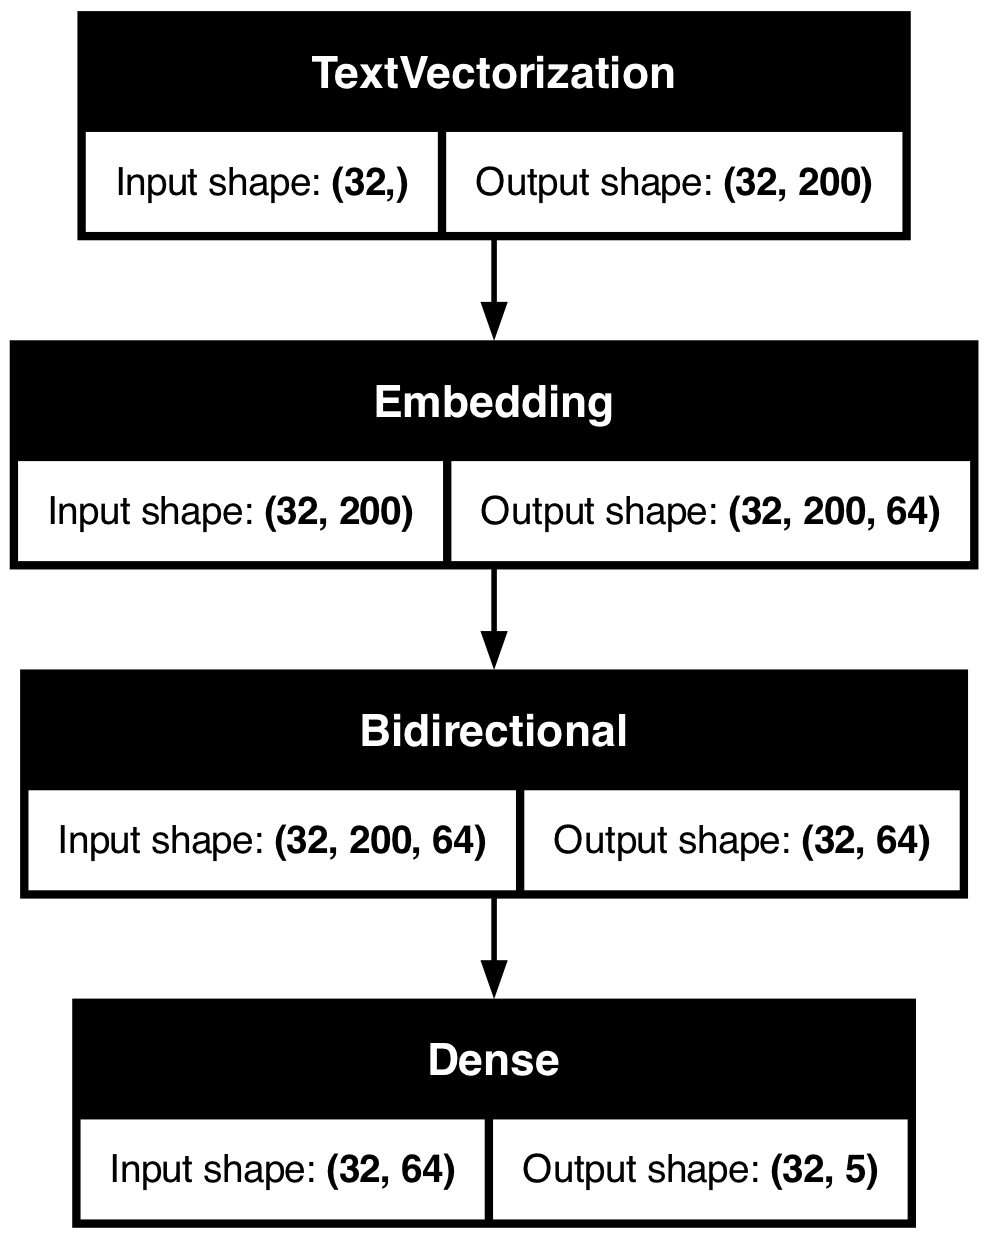

In [ ]:
# Model Architecture
keras.utils.plot_model(model, show_shapes=True)